In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Librerias

In [ ]:
# Instalación de la biblioteca 'mapie'
!pip install mapie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

# SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Mapie
from mapie.time_series_regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap
from mapie.metrics import regression_coverage_score, regression_mean_width_score


# Joblib
import joblib


# Configuración de advertencias y mensajes

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Preproceso

In [ ]:
# Función para dividir una secuencia univariable en muestras

def TrainingSet(sequence, n_steps):
    """
    Divide una secuencia univariable en muestras de entrada y salida.

    Parámetros:
    - sequence (array-like): Secuencia univariable de valores.
    - n_steps (int): Número de pasos de tiempo en cada muestra.

    Retorna:
    - X (array-like): Matriz de muestras de entrada.
    - y (array-like): Vector de valores de salida correspondientes.

		Notas:
    - Esta función divide una secuencia univariable en muestras de entrada (X) y valores de salida (y).
    - 'sequence' es la secuencia de valores que se va a dividir en muestras.
    - 'n_steps' define el número de pasos de tiempo en cada muestra.
    - Para cada paso de tiempo, se forma una muestra que contiene 'n_steps' valores consecutivos.
    - La última muestra utiliza 'n_steps' valores finales de la secuencia.
    - La función devuelve matrices 'X' e 'y' que contienen las muestras de entrada y los valores de salida.
    """

    X, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + n_steps

        if end_ix > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-23 03:43:14--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ili91nl6e789ujm7e26d78qnkekfu6n6/1690083750000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=8fb53691-b3ae-44d6-97bb-ea55ff72e4d3 [following]
--2023-07-23 03:43:14--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ili91nl6e789ujm7e26d78qnkekfu6n6/1690083750000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=8fb53691-b3ae-44d6-97bb-ea55ff72e4d3
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 142.251.2.13

In [ ]:
# Mostrar listado de elementos
!ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [ ]:
# Carga y manipulación de datos de un archivo Excel

# Cargar los datos desde un archivo Excel en un DataFrame 'df1'
df1 = pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

# Eliminar la columna 'Date' del DataFrame 'df1'
df1 = df1.drop('Date', axis=1)

# Generar un rango de fechas horarias y establecerlo como índice del DataFrame
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
df1.set_index(date_rng[0:-1], inplace=True)

# Imprimir información sobre el DataFrame 'df1'
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: xlabel='Date', ylabel='kWh'>

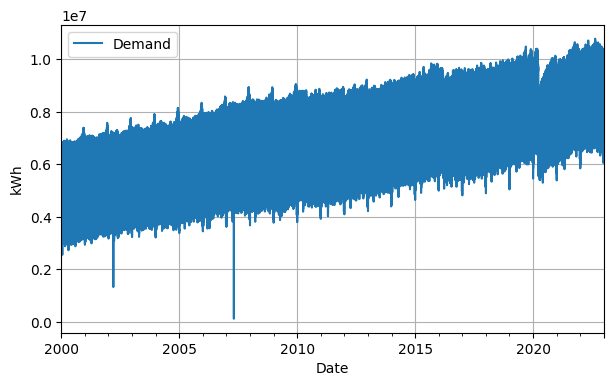

In [ ]:
# Visualización de datos utilizando gráfico de línea

# Generar un gráfico de línea a partir de los datos en 'df1'
df1.plot(
    kind='line',                     # Tipo de gráfico (línea)
    figsize=(7, 4),                  # Tamaño de la figura
    title='Demanda Energia Horaria en Colombia kWh/dia',  # Título del gráfico
    grid=True,                       # Mostrar cuadrícula
    ylabel='kWh',                    # Etiqueta del eje y
    xlabel='Fecha',                  # Etiqueta del eje x
    xlim=('2000-01-01', '2022-12-31')  # Límites del eje x
)

<Axes: xlabel='Date', ylabel='kWh'>

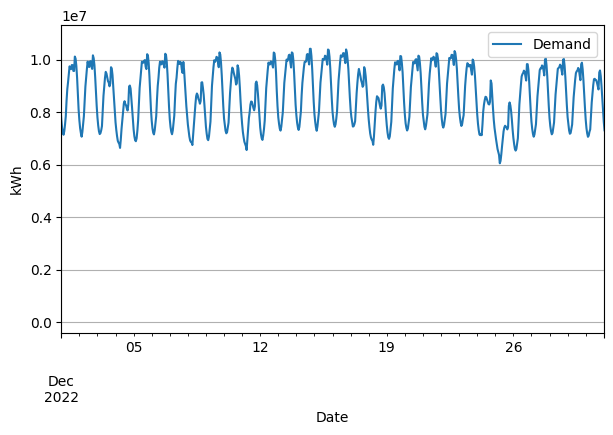

In [ ]:
# Visualización de datos utilizando gráfico de línea con límites específicos

# Generar un gráfico de línea a partir de los datos en 'df1', con límites de fecha específicos
df1.plot(
    kind='line',                     # Tipo de gráfico (línea)
    figsize=(7, 4),                  # Tamaño de la figura
    title='Demanda Energia Horaria en Colombia kWh/dia',  # Título del gráfico
    grid=True,                       # Mostrar cuadrícula
    ylabel='kWh',                    # Etiqueta del eje y
    xlabel='Fecha',                  # Etiqueta del eje x
    xlim=('2022-12-01', '2022-12-31')  # Límites del eje x (rango de fechas)
)

In [ ]:
# Selección y procesamiento de una porción de datos

# Seleccionar y extraer una porción de datos del DataFrame 'df1'
Ts1 = df1['2020-10-01':'2022-12-31'].values  # Un año

# Imprimir el tamaño de la serie horaria resultante
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [ ]:
# Escalado de los datos utilizando Min-Max Scaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos de la serie horaria 'Ts1'
scaler.fit(Ts1)

# Transformar los datos de 'Ts1' utilizando el escalador
Ts1 = scaler.transform(Ts1)

# TS= 30

In [ ]:
# Particionamiento de datos para entrenamiento y prueba (segunda partición)

# Definición del valor de 'step_back' para el particionamiento de datos
step_back = 30

# Generación de conjuntos de entrenamiento y salida utilizando la función 'TrainingSet'
X1, Y1 = TrainingSet(Ts1, step_back)

# Definición del valor de 'Part' para el particionamiento Train-Test
Part = 0.8

# Particionamiento de conjuntos de entrenamiento y prueba (segunda partición)
# Serie 1
X_test1 = X1[int(len(X1) * 0.8):]
X_train1 = X1[:int(len(X1) * 0.8)]
X_test1 = X_test1.reshape(len(X_test1), step_back)
X_train1 = X_train1.reshape(len(X_train1), step_back)

# Particionamiento de conjuntos de salida correspondientes
Y_test1 = Y1[int(len(Y1) * 0.8):]
Y_train1 = Y1[:int(len(Y1) * 0.8)]
Y_test1 = Y_test1.reshape(len(Y_test1), 1)
Y_train1 = Y_train1.reshape(len(Y_train1), 1)

In [ ]:
# Imprimir información sobre los tamaños de los conjuntos de datos

# Imprimir tamaños de los conjuntos de entrenamiento
print('Tamaño X_train: ', X_train.shape, 'Tamaño Y_train: ', Y_train.shape)

# Imprimir tamaños de los conjuntos de validación
print('Tamaño X_val: ', X_Val.shape, 'Tamaño Y_val: ', Y_Val.shape)

# Imprimir tamaños de los conjuntos de prueba
print('Tamaño X_test: ', X_test.shape, 'Tamaño Y_test: ', Y_test.shape)

# Imprimir separador
print('-----------------------------------------------------------------------')

Tamaño X_train1:  (15758, 30) Tamaño Y_train1:  (15758, 1)
Tamaño X_test1:  (3940, 30) Tamaño Y_test1:  (3940, 1)
-----------------------------------------------------------------------


In [ ]:
# Creación y entrenamiento de un modelo de Regresión Vectorial de Soporte (SVR)

# Creación del modelo SVR con parámetros específicos
model = SVR(C=0.5, epsilon=0.001, max_iter=10000)

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento
model.fit(X_train1, Y_train1)

SVR(C=0.5, epsilon=0.001, max_iter=10000)

In [ ]:
# Guardado y descarga de un modelo utilizando joblib

# Guardar el modelo en un archivo utilizando joblib
joblib.dump(model, 'modelo_svr_U_30.joblib')

# Descargar el archivo del modelo guardado
files.download('/content/modelo_svr_U_30.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conformal SVR 30

In [ ]:
# Creación de DataFrames para conjuntos de entrenamiento y prueba (segunda partición)

# Serie 1
X_test = X1[int(len(X1) * 0.8):]
X_train = X1[:int(len(X1) * 0.8)]
X_test = pd.DataFrame(X_test.reshape(len(X_test), step_back))
X_train = pd.DataFrame(X_train.reshape(len(X_train), step_back))

y_test = Y1[int(len(Y1) * 0.8):]
y_train = Y1[:int(len(Y1) * 0.8)]
y_test = pd.DataFrame(y_test.reshape(len(y_test), 1))
y_train = pd.DataFrame(y_train.reshape(len(y_train), 1))
y_test = y_test.squeeze()
y_train = y_train.squeeze()

In [ ]:
# Conformal Prediction utilizando el método Mapie y Block Bootstrap

# Parámetros y configuración
alpha = 0.05   # Nivel de confianza
gap = 1        # Tamaño del espacio entre los intervalos

# Inicialización del método de Block Bootstrap
mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

# Inicialización y ajuste del modelo MapieTimeSeriesRegressor
mapie_enbpi = MapieTimeSeriesRegressor(
    model, method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1)
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

# Predicción utilizando Mapie con el modelo ajustado
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict(X_test, alpha=alpha, ensemble=True, optimize_beta=True)
coverage_npfit = regression_coverage_score(y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])

# Inicialización y ajuste de la predicción utilizando particiones (partial_fit)
y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])


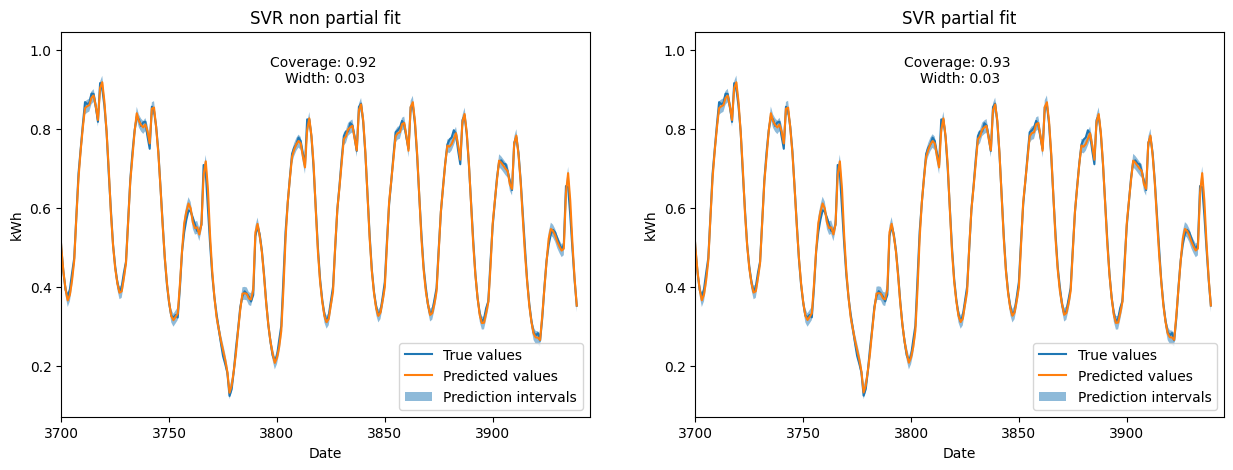

In [ ]:
# Creación y visualización de gráficos comparativos de predicción y intervalos

# Creación de la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1 - SVR sin ajuste parcial
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("SVR non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit, 2)} \nWidth: {round(width_npfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("kWh")
ax1.set_xlim(3700, 3945)
ax1.legend()

# Gráfico 2 - SVR con ajuste parcial
ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("SVR partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit, 2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("kWh")
ax2.set_xlim(3700, 3945)
ax2.legend()

# TS= 42

## Particion TS=42

In [ ]:
# Particionamiento de conjuntos de entrenamiento y prueba

# Definición del tamaño de ventana (time_step/step_back)
step_back = 42

# Particionamiento de la serie temporal utilizando la función TrainingSet
X1, Y1 = TrainingSet(Ts1, step_back)

# Definición del porcentaje de partición (Train_Test)
Part = 0.8

# Particionamiento de los conjuntos de entrenamiento y prueba
X_test1 = X1[int(len(X1)*Part):]
X_train1 = X1[:int(len(X1)*Part)]
X_test1 = X_test1.reshape(len(X_test1), step_back)
X_train1 = X_train1.reshape(len(X_train1), step_back)

Y_test1 = Y1[int(len(Y1)*Part):]
Y_train1 = Y1[:int(len(Y1)*Part)]
Y_test1 = Y_test1.reshape(len(Y_test1), 1)
Y_train1 = Y_train1.reshape(len(Y_train1), 1)

In [ ]:
# Entrenamiento de un modelo de regresión lineal

# Importación de la clase LinearRegression
from sklearn.linear_model import LinearRegression

# Creación de una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo utilizando los conjuntos de entrenamiento
model.fit(X_train1, Y_train1)

LinearRegression()

## Salidas TS=42

In [ ]:
# Guardar y descargar un modelo entrenado utilizando Joblib

# Importación de la función dump de la biblioteca joblib
import joblib

# Guardar el modelo entrenado en un archivo utilizando Joblib
joblib.dump(model, 'modelo_OLS_U_42.joblib')

# Descargar el archivo del modelo guardado
files.download('/content/modelo_OLS_U_42.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conformal OLS 42

In [ ]:
# Particionamiento y transformación de conjuntos de entrenamiento y prueba

# Particionamiento de los conjuntos de entrenamiento y prueba
X_test = X1[int(len(X1)*0.8):]
X_train = X1[:int(len(X1)*0.8)]

# Transformación de los conjuntos de entrenamiento y prueba a DataFrames
X_test = pd.DataFrame(X_test.reshape(len(X_test), step_back))
X_train = pd.DataFrame(X_train.reshape(len(X_train), step_back))

# Particionamiento y transformación de las etiquetas de entrenamiento y prueba
y_test = Y1[int(len(Y1)*0.8):]
y_train = Y1[:int(len(Y1)*0.8)]

# Transformación de las etiquetas de entrenamiento y prueba a DataFrames
y_test = pd.DataFrame(y_test.reshape(len(y_test), 1))
y_train = pd.DataFrame(y_train.reshape(len(y_train), 1))

# Aplastar las etiquetas a una serie unidimensional
y_test = y_test.squeeze()
y_train = y_train.squeeze()

In [ ]:
# Preparación y cálculo de conformal prediction con Model Agnostic PIE (enbpi)

# Configuración de parámetros
alpha = 0.05  # Nivel de confianza
gap = 1  # Intervalo de separación entre pasos

# Configuración de Bootstrap
mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

# Creación de un objeto MapieTimeSeriesRegressor con enbpi
mapie_enbpi = MapieTimeSeriesRegressor(
    model, method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1
)

# Entrenamiento del modelo Mapie enbpi
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

# Predicciones y cálculo de intervalos de predicción no parcial
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict(X_test, alpha=alpha, ensemble=True, optimize_beta=True)
coverage_npfit = regression_coverage_score(y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])

# Predicciones y cálculo de intervalos de predicción parcial
y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])

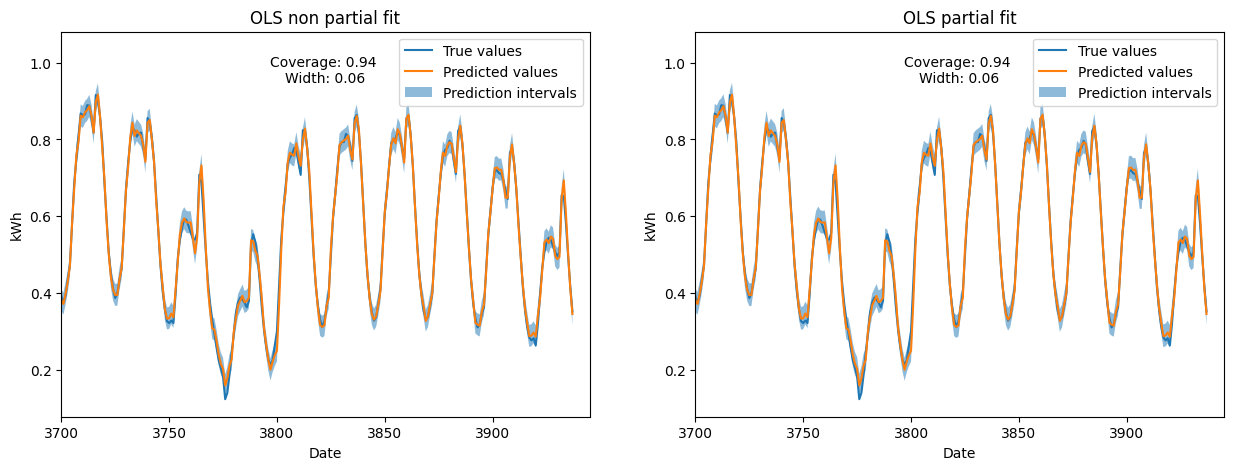

In [ ]:
# Creación de gráficos comparativos de resultados para OLS (Ordinary Least Squares) con conformal prediction

# Creación de una figura con dos subgráficos en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico para OLS con ajuste no parcial
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("OLS non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit, 2)} \nWidth: {round(width_npfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("kWh")
ax1.set_xlim(3700, 3945)
ax1.legend()

# Gráfico para OLS con ajuste parcial
ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("OLS partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit, 2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("kWh")
ax2.set_xlim(3700, 3945)
ax2.legend()

# Tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  1859.7978491783142 segundos
